In [1]:
import simulate
import baseline
import dataload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
#import pypots
from pypots.data import load_specific_dataset, mcar, masked_fill
from pypots.imputation import SAITS, BRITS
from pypots.utils.metrics import cal_mae, cal_rmse, cal_mre

In [6]:
import torch

original = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/intact_0.pt')

imputation_SAITS_MCAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/imputation_0.pt')
imputation_SAITS_MAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/imputation_1.pt')
imputation_SAITS_MNAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/imputation_2.pt')

mask_SAITS_MCAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/mask_0.pt')
mask_SAITS_MAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/mask_1.pt')
mask_SAITS_MNAR = torch.load('D:/GitHub/ece209as_project/data/visualization_data/SAITS/mask_2.pt')

In [31]:
missing_SAITS_MCAR = original.copy()
missing_SAITS_MCAR[np.where(mask_SAITS_MCAR[:,:,:]==1)] = np.NaN

missing_SAITS_MAR = original.copy()
missing_SAITS_MAR[np.where(mask_SAITS_MAR[:,:,:]==1)] = np.NaN

missing_SAITS_MNAR = original.copy()
missing_SAITS_MNAR[np.where(mask_SAITS_MNAR[:,:,:]==1)] = np.NaN

In [145]:
def threshold_plot(signal, mask, opt=True):
    # red = signal.copy()
    # red[np.where(mask[:]==1)] = np.NaN
    # blue = signal.copy()
    # blue[np.where(mask[:]!=1)] = np.NaN
    # plt.plot(red, 'r', red, 'b')
    x = range(len(signal))
    for x1, x2, y1, y2 in zip(x, x[1:], signal, signal[1:]):
        if((mask[x2] == 1 and opt) or (mask[x1] == 1 and not opt)):
            plt.plot([x1, x2], [y1, y2], 'r')
        else:
            plt.plot([x1, x2], [y1, y2], 'b')

Text(0.5, 1.0, 'Imputed Timeseries')

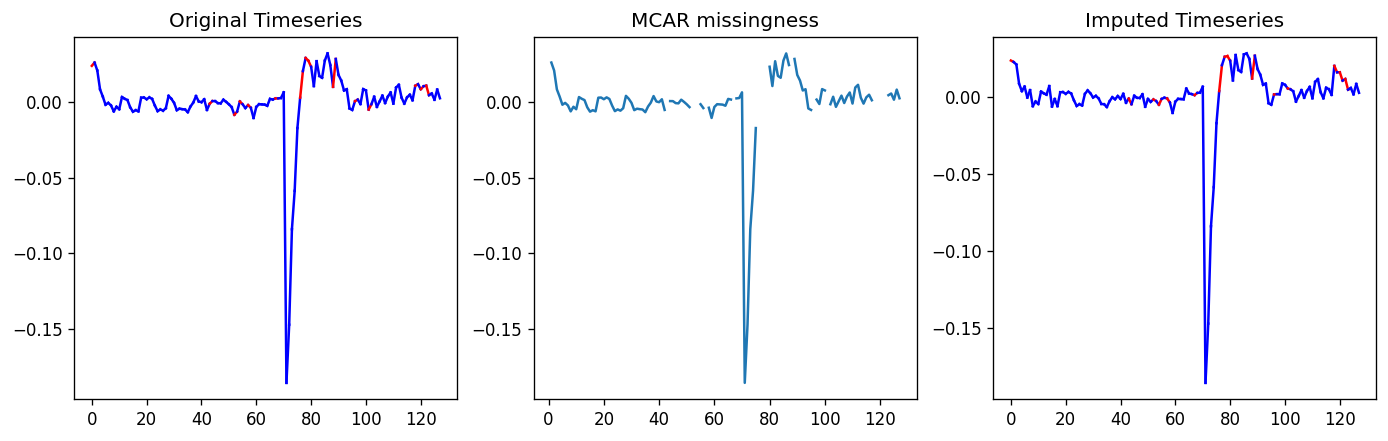

In [114]:
# MCAR

user_id = 1000
channel = 7
figX, figY = 14,4 
dpi = 120

figure(figsize=(figX, figY), dpi=dpi)
plt.subplot(1, 3, 1)
# plt.plot(original[user_id,:,channel])
threshold_plot(original[user_id,:,channel], mask_SAITS_MCAR[user_id,:,channel])
plt.title('Original Timeseries')
plt.subplot(1, 3, 2)
plt.plot(missing_SAITS_MCAR[user_id,:,channel])
plt.title('MCAR missingness')
plt.subplot(1, 3, 3)
threshold_plot(imputation_SAITS_MCAR[user_id,:,channel], mask_SAITS_MCAR[user_id,:,channel])
# plt.plot(imputation_SAITS_MCAR[user_id,:,channel])
plt.title('Imputed Timeseries')


Text(0.5, 1.0, 'Imputed Timeseries')

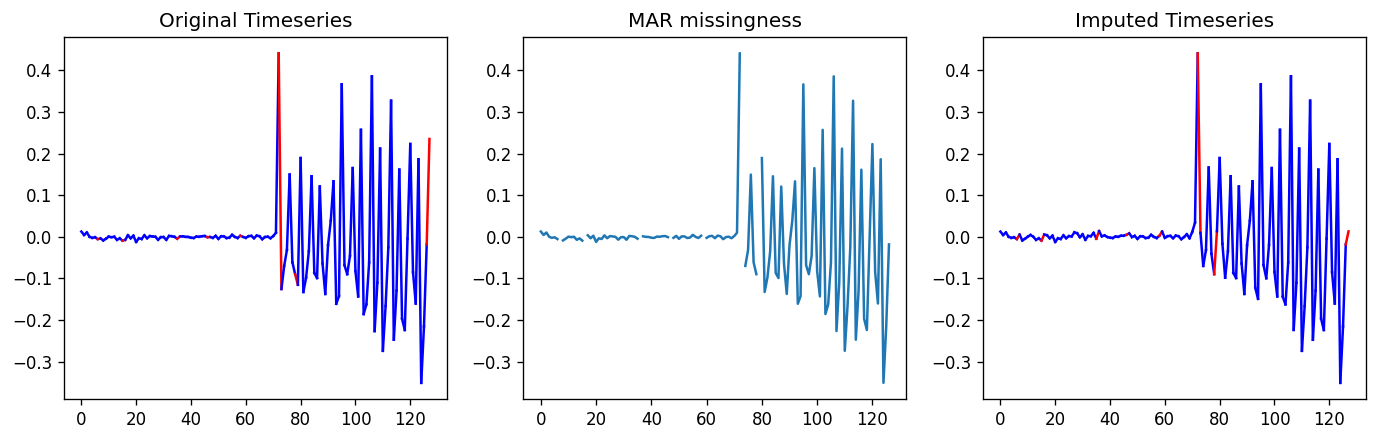

In [163]:
# MAR 

user_id = 4949
channel = 3
figX, figY = 14,4 
dpi = 120

figure(figsize=(figX, figY), dpi=dpi)
plt.subplot(1, 3, 1)
# plt.plot(original[user_id,:,channel])
threshold_plot(original[user_id,:,channel], mask_SAITS_MAR[user_id,:,channel])
plt.title('Original Timeseries')
plt.subplot(1, 3, 2)
plt.plot(missing_SAITS_MAR[user_id,:,channel])
plt.title('MAR missingness')
plt.subplot(1, 3, 3)
threshold_plot(imputation_SAITS_MAR[user_id,:,channel], mask_SAITS_MAR[user_id,:,channel])
# plt.plot(imputation_SAITS_MAR[user_id,:,channel])
plt.title('Imputed Timeseries')

Text(0.5, 1.0, 'Imputed Timeseries')

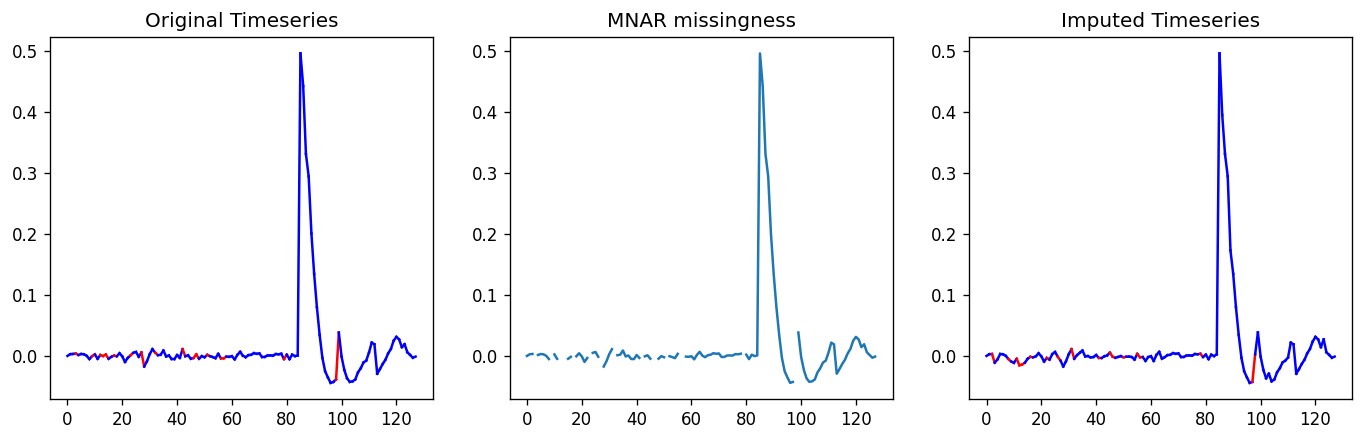

In [148]:
# MNAR

user_id = 999
channel = 8
figX, figY = 14,4 
dpi = 120

figure(figsize=(figX, figY), dpi=dpi)
plt.subplot(1, 3, 1)
threshold_plot(original[user_id,:,channel], mask_SAITS_MNAR[user_id,:,channel], opt=False)
# plt.plot(original[user_id,:,channel])
plt.title('Original Timeseries')
plt.subplot(1, 3, 2)
plt.plot(missing_SAITS_MNAR[user_id,:,channel])
plt.title('MNAR missingness')
plt.subplot(1, 3, 3)
threshold_plot(imputation_SAITS_MNAR[user_id,:,channel], mask_SAITS_MNAR[user_id,:,channel])
# plt.plot(imputation_SAITS_MNAR[user_id,:,channel])
plt.title('Imputed Timeseries')